In [12]:
#from google.colab import files
#uploaded = files.upload()

In [7]:
#!pip install yfinance

In [5]:
import yfinance as yf

In [8]:
ticket = yf.Ticker("BTC-USD")

df = ticket.history(period="max")
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0,0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0,0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0,0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0,0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0,0
...,...,...,...,...,...,...,...
2022-11-07 00:00:00+00:00,20924.621094,21053.246094,20489.972656,20602.816406,53510852236,0,0
2022-11-08 00:00:00+00:00,20600.671875,20664.607422,17603.544922,18541.271484,118992465607,0,0
2022-11-09 00:00:00+00:00,18543.761719,18590.458984,15682.692383,15880.780273,102905151606,0,0


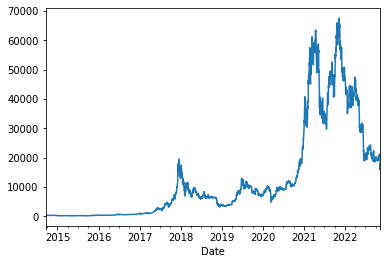

In [9]:
df['Close'].plot()

In [ ]:
from sample_data import generate_sample_data
from tqdm.notebook import tqdm_notebook
import pandas as pd



In [17]:
import numpy as np
import pandas as pd

r = 0.05  # constant short rate
sigma = 0.5  # volatility factor


def generate_sample_data(rows, cols, freq='1min'):
    '''
    Function to generate sample financial data.

    Parameters
    ==========
    rows: int
        number of rows to generate
    cols: int
        number of columns to generate
    freq: str
        frequency string for DatetimeIndex

    Returns
    =======
    df: DataFrame
        DataFrame object with the sample data
    '''
    rows = int(rows)
    cols = int(cols)
    # generate a DatetimeIndex object given the frequency
    index = pd.date_range('2021-1-1', periods=rows, freq=freq)
    # determine time delta in year fractions
    dt = (index[1] - index[0]) / pd.Timedelta(value='365D')
    # generate column names
    columns = ['No%d' % i for i in range(cols)]
    # generate sample paths for geometric Brownian motion
    raw = np.exp(np.cumsum((r - 0.5 * sigma ** 2) * dt +
                 sigma * np.sqrt(dt) *
                 np.random.standard_normal((rows, cols)), axis=0))
    # normalize the data to start at 100
    raw = raw / raw[0] * 100
    # generate the DataFrame object
    df = pd.DataFrame(raw, index=index, columns=columns)
    return df

In [18]:
%time data = generate_sample_data(rows=5e6, cols=10).round(4)

CPU times: user 5.17 s, sys: 633 ms, total: 5.8 s
Wall time: 6.08 s


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5000000 entries, 2021-01-01 00:00:00 to 2030-07-05 05:19:00
Freq: T
Data columns (total 10 columns):
 #   Column  Dtype  
---  ------  -----  
 0   No0     float64
 1   No1     float64
 2   No2     float64
 3   No3     float64
 4   No4     float64
 5   No5     float64
 6   No6     float64
 7   No7     float64
 8   No8     float64
 9   No9     float64
dtypes: float64(10)
memory usage: 419.6 MB


In [21]:
h5 = pd.HDFStore('data.h5', 'w')

In [22]:
%time h5['data'] = data

CPU times: user 251 ms, sys: 660 ms, total: 911 ms
Wall time: 1.41 s


In [23]:
h5

<class 'pandas.io.pytables.HDFStore'>
File path: data.h5

In [24]:
list(h5)

['/data']

In [25]:
type(h5)

pandas.io.pytables.HDFStore

In [26]:
ls -n "\"

/bin/bash: -c: line 0: unexpected EOF while looking for matching `"'
/bin/bash: -c: line 1: syntax error: unexpected end of file


In [27]:
h5.close()

In [28]:
h5 = pd.HDFStore('data.h5', 'r')

In [29]:
%time data_copy = h5['data']

CPU times: user 478 ms, sys: 385 ms, total: 863 ms
Wall time: 862 ms


In [30]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5000000 entries, 2021-01-01 00:00:00 to 2030-07-05 05:19:00
Freq: T
Data columns (total 10 columns):
 #   Column  Dtype  
---  ------  -----  
 0   No0     float64
 1   No1     float64
 2   No2     float64
 3   No3     float64
 4   No4     float64
 5   No5     float64
 6   No6     float64
 7   No7     float64
 8   No8     float64
 9   No9     float64
dtypes: float64(10)
memory usage: 419.6 MB


In [31]:
h5.close()

In [32]:
#rm 'data/data.h5'
!rm "data.h5"

#### Using to_hdf method

In [42]:
!rmi data

/bin/bash: rmi: command not found


In [43]:
%time data.to_hdf('data/data.h5', 'data', format='table')

CPU times: user 4.08 s, sys: 1.23 s, total: 5.31 s
Wall time: 5.46 s


In [46]:
ls -n data/data.*

-rw-r--r-- 1 0 0 446911563 Nov 11 18:54 data/data.h5


In [47]:
%time data_copy = pd.read_hdf('data/data.h5', 'data')

CPU times: user 192 ms, sys: 555 ms, total: 746 ms
Wall time: 745 ms


In [48]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5000000 entries, 2021-01-01 00:00:00 to 2030-07-05 05:19:00
Freq: T
Data columns (total 10 columns):
 #   Column  Dtype  
---  ------  -----  
 0   No0     float64
 1   No1     float64
 2   No2     float64
 3   No3     float64
 4   No4     float64
 5   No5     float64
 6   No6     float64
 7   No7     float64
 8   No8     float64
 9   No9     float64
dtypes: float64(10)
memory usage: 419.6 MB


In [49]:
import tables as tb

In [39]:
#!mkdir data

In [50]:
h5 = tb.open_file('data/data.h5', 'r')

In [51]:
h5

File(filename=data/data.h5, title='', mode='r', root_uep='/', filters=Filters(complevel=0, shuffle=False, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/data (Group) ''
/data/table (Table(5000000,)) ''
  description := {
  "index": Int64Col(shape=(), dflt=0, pos=0),
  "values_block_0": Float64Col(shape=(10,), dflt=0.0, pos=1)}
  byteorder := 'little'
  chunkshape := (2978,)
  autoindex := True
  colindexes := {
    "index": Index(6, mediumshuffle, zlib(1)).is_csi=False}

In [52]:
h5.root.data.table[:3]

array([(1609459200000000000, [100.    , 100.    , 100.    , 100.    , 100.    , 100.    , 100.    , 100.    , 100.    , 100.    ]),
       (1609459260000000000, [ 99.967 , 100.1115, 100.0012,  99.8922, 100.0089,  99.9638, 100.0376,  99.9883, 100.0087, 100.0016]),
       (1609459320000000000, [ 99.9052, 100.1579, 100.0612,  99.9629,  99.969 , 100.0007, 100.1066, 100.0429, 100.0452,  99.8837])],
      dtype=[('index', '<i8'), ('values_block_0', '<f8', (10,))])

In [53]:
h5.close()

In [55]:
!rm data/data.h5

#### TsTables package

In [56]:
%%time

data = generate_sample_data(rows=2.5e6, cols=5, freq='1s').round(4)

CPU times: user 1.07 s, sys: 137 ms, total: 1.21 s
Wall time: 1.2 s


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2500000 entries, 2021-01-01 00:00:00 to 2021-01-29 22:26:39
Freq: S
Data columns (total 5 columns):
 #   Column  Dtype  
---  ------  -----  
 0   No0     float64
 1   No1     float64
 2   No2     float64
 3   No3     float64
 4   No4     float64
dtypes: float64(5)
memory usage: 114.4 MB


In [58]:
#!pip install tstables
#!pip uninstall tstables
!pip install git+https://github.com/yhilpisch/tstables.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/yhilpisch/tstables.git to /tmp/pip-req-build-mfpaa65n
  Running command git clone -q https://github.com/yhilpisch/tstables.git /tmp/pip-req-build-mfpaa65n
  Created wheel for tstables: filename=tstables-0.0.15-py3-none-any.whl size=10323 sha256=0e42ad444f7698d4e57f457d4884356bdf12221c9233ec167326fbeead3ce4a2
  Stored in directory: /tmp/pip-ephem-wheel-cache-6cqrz4mn/wheels/ea/3d/f4/01603f3ae4b8db9f85f4a17bc7aacbdb2eaf03375e25104b1c
Successfully built tstables


In [59]:
import tstables
import tables as tb

In [60]:
class desc(tb.IsDescription):
    ''' Description of TsTables table structure.
    '''
    
    timestamp = tb.Int64Col(pos=0)
    No0 = tb.Float64Col(pos=1)
    No1 = tb.Float64Col(pos=2)
    No2 = tb.Float64Col(pos=3)
    No3 = tb.Float64Col(pos=4)
    No4 = tb.Float64Col(pos=5)

In [61]:
h5.close()

In [62]:
h5 = tb.open_file('data/data.h5ts', 'w')

In [63]:
ts = h5.create_ts('/', 'data', desc)

In [64]:
type(h5)

tables.file.File

In [65]:
type(ts)

tstables.tstable.TsTable

In [66]:
h5

File(filename=data\data.h5ts, title='', mode='w', root_uep='/', filters=Filters(complevel=0, shuffle=False, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/data (Group/Timeseries) ''
/data/y2022 (Group) ''
/data/y2022/m11 (Group) ''
/data/y2022/m11/d11 (Group) ''
/data/y2022/m11/d11/ts_data (Table(0,)) ''
  description := {
  "timestamp": Int64Col(shape=(), dflt=0, pos=0),
  "No0": Float64Col(shape=(), dflt=0.0, pos=1),
  "No1": Float64Col(shape=(), dflt=0.0, pos=2),
  "No2": Float64Col(shape=(), dflt=0.0, pos=3),
  "No3": Float64Col(shape=(), dflt=0.0, pos=4),
  "No4": Float64Col(shape=(), dflt=0.0, pos=5)}
  byteorder := 'little'
  chunkshape := (1365,)

In [67]:
ts

In [68]:
%time ts.append(data)

CPU times: user 586 ms, sys: 206 ms, total: 792 ms
Wall time: 856 ms


In [69]:
h5

File(filename=data\data.h5ts, title='', mode='w', root_uep='/', filters=Filters(complevel=0, shuffle=False, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/data (Group/Timeseries) ''
/data/y2021 (Group) ''
/data/y2022 (Group) ''
/data/y2022/m11 (Group) ''
/data/y2022/m11/d11 (Group) ''
/data/y2022/m11/d11/ts_data (Table(0,)) ''
  description := {
  "timestamp": Int64Col(shape=(), dflt=0, pos=0),
  "No0": Float64Col(shape=(), dflt=0.0, pos=1),
  "No1": Float64Col(shape=(), dflt=0.0, pos=2),
  "No2": Float64Col(shape=(), dflt=0.0, pos=3),
  "No3": Float64Col(shape=(), dflt=0.0, pos=4),
  "No4": Float64Col(shape=(), dflt=0.0, pos=5)}
  byteorder := 'little'
  chunkshape := (1365,)
/data/y2021/m01 (Group) ''
/data/y2021/m01/d01 (Group) ''
/data/y2021/m01/d01/ts_data (Table(86400,)) ''
  description := {
  "timestamp": Int64Col(shape=(), dflt=0, pos=0),
  "No0": Float64Col(shape=(), dflt=0.0, pos=1),
  "No1": Float64Col(shape=(), dflt=0.0, pos=2),
  "No2

In [70]:
import datetime

In [71]:
start = datetime.datetime(2021, 1, 2)

In [72]:
end = datetime.datetime(2021, 1, 5, 17, 15, 30)

In [75]:
%time subset = ts.read_range(start, end)

CPU times: user 94.2 ms, sys: 21.9 ms, total: 116 ms
Wall time: 118 ms


In [76]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 321331 entries, 2021-01-02 00:00:00 to 2021-01-05 17:15:30
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   No0     321331 non-null  float64
 1   No1     321331 non-null  float64
 2   No2     321331 non-null  float64
 3   No3     321331 non-null  float64
 4   No4     321331 non-null  float64
dtypes: float64(5)
memory usage: 14.7 MB


In [77]:
h5.close()

In [83]:
!rm data\*

rm: cannot remove 'data*': No such file or directory


In [84]:
#@title Storing Data with SQLite3

In [85]:
%time data = generate_sample_data(1e6, 5, '1min').round(4)

CPU times: user 538 ms, sys: 165 ms, total: 703 ms
Wall time: 769 ms


In [87]:
data[:5]

,No0,No1,No2,No3,No4
2021-01-01 00:00:00,100.0000,100.0000,100.0000,100.0000,100.0000
2021-01-01 00:01:00,100.0633,100.0563,100.0992,99.8188,99.9369
2021-01-01 00:02:00,100.0415,100.0105,99.9639,99.7978,99.9170
2021-01-01 00:03:00,100.0425,100.0177,100.0473,99.7706,99.8420
2021-01-01 00:04:00,100.0324,100.0437,100.1108,99.6923,99.7392


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000000 entries, 2021-01-01 00:00:00 to 2022-11-26 10:39:00
Freq: T
Data columns (total 5 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   No0     1000000 non-null  float64
 1   No1     1000000 non-null  float64
 2   No2     1000000 non-null  float64
 3   No3     1000000 non-null  float64
 4   No4     1000000 non-null  float64
dtypes: float64(5)
memory usage: 45.8 MB


In [89]:
import sqlite3 as sq3

In [90]:
con = sq3.connect('data/data.sql')

In [91]:
from pandas.io.sql import to_sql

%time data.to_sql('data', con)

CPU times: user 5.66 s, sys: 502 ms, total: 6.16 s
Wall time: 6.62 s


In [92]:
ls -n data/data.*

-rw-r--r-- 1 0 0 105316352 Nov 11 19:46 data/data.sql


In [93]:
query = 'SELECT * FROM data WHERE No1 > 105 AND No2 < 108'

In [98]:
%time res = con.execute(query).fetchall()

CPU times: user 95.5 ms, sys: 27.3 ms, total: 123 ms
Wall time: 264 ms


In [99]:
res[:5]

[('2021-01-02 07:20:00', 94.7465, 105.0102, 98.366, 96.5466, 95.9111),
 ('2021-01-02 07:21:00', 94.657, 105.1327, 98.408, 96.5713, 95.8929),
 ('2021-01-02 07:22:00', 94.6679, 105.1209, 98.4628, 96.6073, 95.8567),
 ('2021-01-02 07:23:00', 94.7103, 105.0987, 98.4849, 96.6077, 95.9016),
 ('2021-01-02 07:24:00', 94.7291, 105.2672, 98.4339, 96.5741, 95.9267)]

In [100]:
len(res)

3539

In [101]:
con.close()

In [102]:
rm data/*